<a href="https://colab.research.google.com/github/Tanvir007/Land-Use-Land-Cover-GIS-/blob/main/LULC_new2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading Modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data science/LULC(new2).csv')
df.head

<bound method NDFrame.head of     Bare land  Forest  Grassland   Urban  Water
0        5.45   53.43      17.13   8.660  15.33
1        4.06   52.50      17.59  10.560  15.30
2        5.99   47.42      17.75  13.680  15.17
3        4.44   50.50      14.47  15.950  14.64
4        4.13   50.85      10.54  20.150  14.33
5        4.45   45.02      10.87  23.560  16.09
6        4.77   46.65      11.89  22.040  14.65
7        4.19   44.18       7.71  29.002  14.24
8        4.08   42.83       6.17  32.000  14.10
9        3.97   41.47       4.64  35.014  13.96
10       3.87   40.11       3.10  38.020  13.81
11       3.34   33.33      -4.55  53.050  13.09>

In [3]:
df.shape

(12, 5)

In [4]:

df.describe()

,Bare land,Forest,Grassland,Urban,Water
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4.395000,45.690833,9.775833,25.140500,14.559167
std,0.719577,5.819894,6.745107,12.937943,0.815659
min,3.340000,33.330000,-4.550000,8.660000,13.090000
25%,4.037500,42.490000,5.787500,15.382500,14.065000
50%,4.160000,45.835000,10.705000,22.800000,14.485000
75%,4.530000,50.587500,15.135000,32.753500,15.202500
max,5.990000,53.430000,17.750000,53.050000,16.090000


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bare land  12 non-null     float64
 1   Forest     12 non-null     float64
 2   Grassland  12 non-null     float64
 3   Urban      12 non-null     float64
 4   Water      12 non-null     float64
dtypes: float64(5)
memory usage: 608.0 bytes


In [6]:

x = df.drop(['Urban'],axis = 1)

In [7]:
x

,Bare land,Forest,Grassland,Water
0,5.45,53.43,17.13,15.33
1,4.06,52.50,17.59,15.30
2,5.99,47.42,17.75,15.17
3,4.44,50.50,14.47,14.64
4,4.13,50.85,10.54,14.33
5,4.45,45.02,10.87,16.09
6,4.77,46.65,11.89,14.65
7,4.19,44.18,7.71,14.24
8,4.08,42.83,6.17,14.10
9,3.97,41.47,4.64,13.96


In [8]:

y = df.Urban

In [9]:
y

0      8.660
1     10.560
2     13.680
3     15.950
4     20.150
5     23.560
6     22.040
7     29.002
8     32.000
9     35.014
10    38.020
11    53.050
Name: Urban, dtype: float64

In [10]:

#import library
from sklearn.model_selection import train_test_split

In [11]:

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [12]:

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

In [13]:

regressor = LinearRegression()

In [14]:
regressor.fit(xtrain, ytrain)

LinearRegression()

In [15]:


xtest.head()

,Bare land,Forest,Grassland,Water
6,4.77,46.65,11.89,14.65
11,3.34,33.33,-4.55,13.09
4,4.13,50.85,10.54,14.33
10,3.87,40.11,3.10,13.81


In [16]:

ytest.head()

6     22.04
11    53.05
4     20.15
10    38.02
Name: Urban, dtype: float64

In [17]:

ytrain.head()

2    13.680
8    32.000
1    10.560
7    29.002
9    35.014
Name: Urban, dtype: float64

In [18]:

xtrain.head()

,Bare land,Forest,Grassland,Water
2,5.99,47.42,17.75,15.17
8,4.08,42.83,6.17,14.10
1,4.06,52.50,17.59,15.30
7,4.19,44.18,7.71,14.24
9,3.97,41.47,4.64,13.96


In [19]:

ytest

6     22.04
11    53.05
4     20.15
10    38.02
Name: Urban, dtype: float64

In [20]:

# Predicting the Test set results
pred = regressor.predict(xtest)

In [21]:

pred

array([21.66943919, 53.19888485, 19.66902178, 38.09204156])

In [22]:

regressor.score(xtest,ytest)

0.9994438424460809

In [23]:

import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [24]:

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

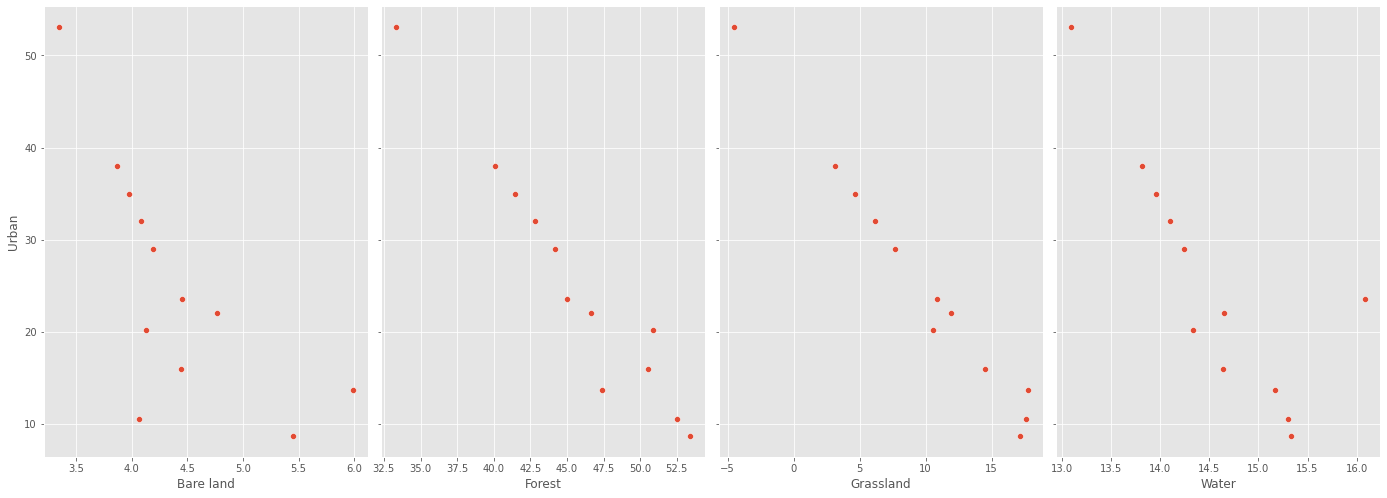

In [25]:

sns.pairplot(df,x_vars=['Bare land','Forest','Grassland','Water'],y_vars='Urban',height=7,aspect=0.7)

In [26]:
from sklearn.metrics import r2_score

In [27]:

score=r2_score(ytest,pred)

In [28]:
score

0.9994438424460809

In [29]:
print(regressor.intercept_)

95.3833433269512


In [30]:
print(regressor.coef_)

[-1.03285976 -0.99619994 -0.94945469 -0.75258836]


In [31]:

list(zip(['Bare land','Forest','Grassland','Water'],regressor.coef_))

[('Bare land', -1.0328597568360405),
 ('Forest', -0.9961999432589399),
 ('Grassland', -0.9494546909592514),
 ('Water', -0.7525883594533345)]

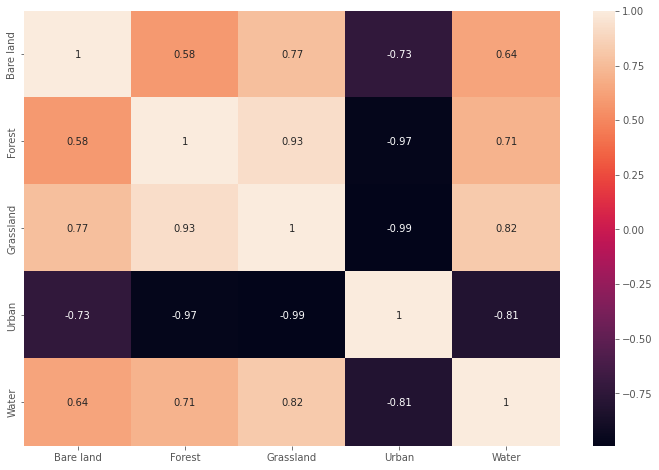

In [32]:

sns.heatmap(df.corr(),annot=True)

In [33]:
from sklearn.metrics import r2_score
lm2=LinearRegression()
lm2.fit(x[['Bare land','Grassland','Water']],y)
lm2_pred=lm2.predict(x[['Bare land','Grassland','Water']])
print(r2_score(y,lm2_pred))

0.9846220085547904


In [34]:

lm3=LinearRegression()
lm3.fit(x[['Bare land','Forest','Grassland','Water']],y)
lm3_pred=lm3.predict(x[['Bare land','Forest','Grassland','Water']])
print(r2_score(y,lm3_pred))
     

0.9998328992286651


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=df.drop('Urban',axis=1)
y=df['Urban']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm4=LinearRegression().fit(x_train,y_train)
lm4_pred=lm4.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm4_pred)))
print("R*2:",r2_score(y_test,lm4_pred))


RMSE: 1.3286043630757083
R*2: 0.7542803983330557


In [36]:

X=df.drop(['Urban','Water'],axis=1)
y=df['Urban']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm5=LinearRegression().fit(x_train,y_train)
lm5_pred=lm5.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm5_pred)))
print("R*2:",r2_score(y_test,lm5_pred))

RMSE: 0.8097283480124342
R*2: 0.9087301909837548


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


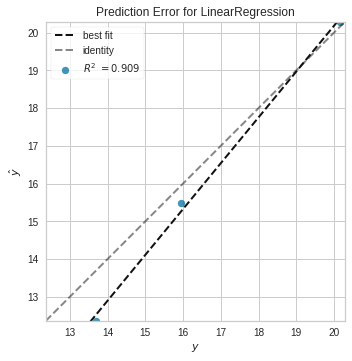

In [37]:

from yellowbrick.regressor import PredictionError,ResidualsPlot
v=PredictionError(lm5).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()

In [38]:
df['interaction']=df['Grassland']*df['Forest']
X=df[['Bare land','Water','interaction']]
y=df['Urban']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)
                                            
lm6=LinearRegression().fit(x_train,y_train)
lm6_pred=lm6.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm6_pred)))
print("R*2:",r2_score(y_test,lm6_pred))

RMSE: 3.612760206409731
R*2: -0.8168820205642848


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


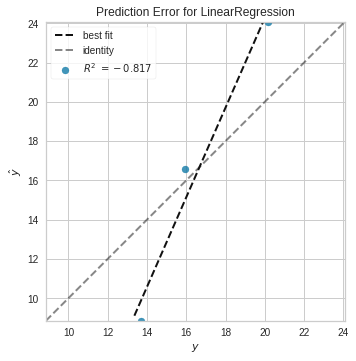

In [39]:

v=PredictionError(lm6).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()